# Import and settings

In [1]:
%load_ext autoreload
%autoreload 2

%run ../../common_settings.py

In [29]:
def check_pooled(h5ad, **kwargs):
    sc.settings.verbosity = 0
    ad = sc.read(h5ad)
    print(ad)
    sk.plot_embedding(ad, basis='umap_hm', groupby='joint_annot');

    mkst = sk.calc_marker_stats(ad, groupby='joint_annot')
    mks = sk.filter_marker_stats(mkst[2], **kwargs)
    sk.plot_markers(ad, groupby='joint_annot', mks=mks, dot_max=0.5, standard_scale='var', cmap='viridis');

    fsk_ad = ad[ad.obs.dataset=='fetal_skin'].copy()
    org_ad = ad[ad.obs.dataset=='organoid'].copy()

    for sub_ad in (fsk_ad, org_ad):
        sk.plot_genes(
            sub_ad, mks.groupby('top_frac_group').head(3).index.to_list(), basis='umap_hm', vmin=0, vmax=3, size=10,
            xlim=(ad.obsm['X_umap_hm'][:, 0].min()*1.1, ad.obsm['X_umap_hm'][:, 0].max()*1.1),
            ylim=(ad.obsm['X_umap_hm'][:, 1].min()*1.1, ad.obsm['X_umap_hm'][:, 1].max()*1.1),
        )
    sc.settings.verbosity = 1
    return ad, fsk_ad, org_ad

# Load data

In [31]:
org_raw_ad = sc.read('organoid_concatenated.raw.h5ad')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [69]:
org_raw_ad.var_names_make_unique()

In [32]:
org_raw_ad

AnnData object with n_obs × n_vars = 147089 × 32991
    obs: 'day', 'sample_id', 'strain', 'version', 'week'
    var: 'gene_symbols', 'gene_ids'

In [33]:
org_raw_ad.obs_names

Index(['AAACCCAAGAAATTGC-1-0', 'AAACCCAAGAATACAC-1-0', 'AAACCCAAGCTAAACA-1-0',
       'AAACCCAAGTGAACAT-1-0', 'AAACCCACAATAGTCC-1-0', 'AAACCCACACCTTCCA-1-0',
       'AAACCCACAGACCCGT-1-0', 'AAACCCACAGTCTTCC-1-0', 'AAACCCACAGTTACCA-1-0',
       'AAACCCAGTCGAACAG-1-0',
       ...
       'TTTGTCAAGGTCATCT-1-11', 'TTTGTCAAGGTGTGGT-1-11',
       'TTTGTCAAGTCATCCA-1-11', 'TTTGTCACAGCGAACA-1-11',
       'TTTGTCACATGACATC-1-11', 'TTTGTCACATGCCCGA-1-11',
       'TTTGTCAGTAGTACCT-1-11', 'TTTGTCATCAAGAAGT-1-11',
       'TTTGTCATCAGGCAAG-1-11', 'TTTGTCATCTTGTACT-1-11'],
      dtype='object', name='index', length=147089)

In [2]:
fsk_processed_ad = sc.read('fetal_skin.processed.20200829.h5ad')

Only considering the two last: ['.20200829', '.h5ad'].
Only considering the two last: ['.20200829', '.h5ad'].


In [100]:
fsk_processed_ad.obs.annot2.cat.categories

Index(['ASDC', 'Activated mac', 'Adipocytes', 'Arterial', 'B cell', 'Basal',
       'Basal POSTN+', 'Basal SHH+', 'CD4 T cell', 'CD8 T cell',
       'Capillary (venular tip)', 'Capillary/postcapillary venule',
       'Companion layer', 'Cuticle/cortex', 'DC1', 'DC2', 'Dermal condensate',
       'Early LE', 'Early endothelial cell', 'Early erythroid',
       'Early erythroid (embryonic)', 'Early fibroblast FRZB+',
       'Early fibroblast HOXC5+', 'Early myocytes',
       'Eo/baso/mast cell progenitor', 'Erythroid (embryonic)',
       'Erythroid (fetal)', 'Fibroblast WNT2+', 'Fibroblasts unknown', 'HSC',
       'ILC2', 'ILC3', 'Immature basal', 'Immature suprabasal',
       'Inflammatory DC', 'Inner root sheath', 'LC', 'LE', 'LTi',
       'Lymphoid progenitor', 'MEMP - Early erythroid', 'MEMP - Megak', 'MSC',
       'Mac-mono', 'Macrophage1', 'Macrophage2', 'Mast cell (earliest)',
       'Mast cell (medium)', 'Mast cell (most mature)', 'Megakaryocyte',
       'Melanoblast', 'Melanocyte'

## Endothelium

AnnData object with n_obs × n_vars = 2048 × 14908
    obs: 'batch', 'chemistry_sorting', 'dataset', 'day', 'donor', 'gender', 'n_counts', 'n_genes', 'nh3_annot1', 'percent_hb', 'percent_mito', 'percent_ribo', 'percent_top50', 'rachel_annot3', 'sample_id', 'strain', 'week', 'annot', 'leiden_hm_r0_1', 'leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9', 'leiden_hm_split1', 'joint_annot', '__is_in_cluster__', 'leiden_r0_1', 'leiden_r0_3', 'leiden_r0_5', 'leiden_r0_7', 'leiden_r0_9'
    var: 'gene_ids', 'hb', 'cc', 'mito', 'ribo', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'hvg_full'
    uns: 'dendrogram_joint_annot', 'leiden', 'neighbors', 'neighbors_hm', 'pca', 'rank_genes_groups_de.Capillary (arterial tip)-Capillary (venular tip)', 'rank_genes_groups_de.Capillary (arterial tip)-Capillary (venular tip)_filtered', 'rank_genes_groups_de.Capillary (venular tip)-Capillary (arterial tip)', 'rank_genes_groups_de.Capillary (venular t

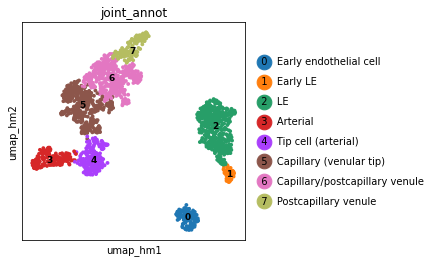

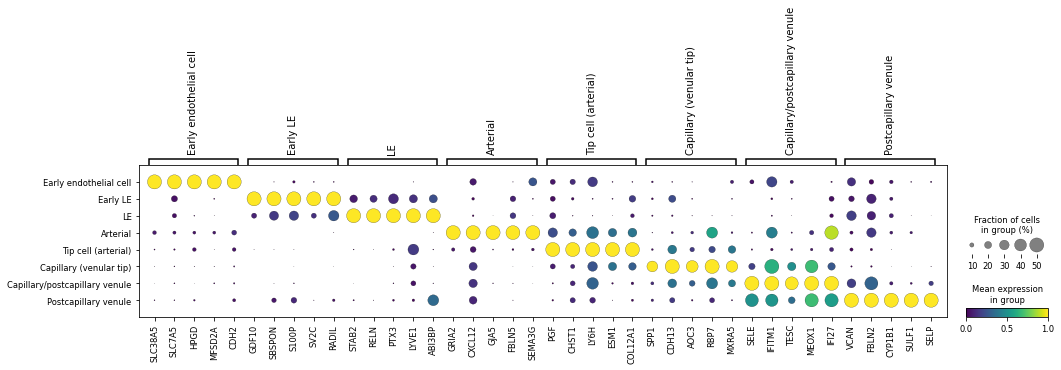

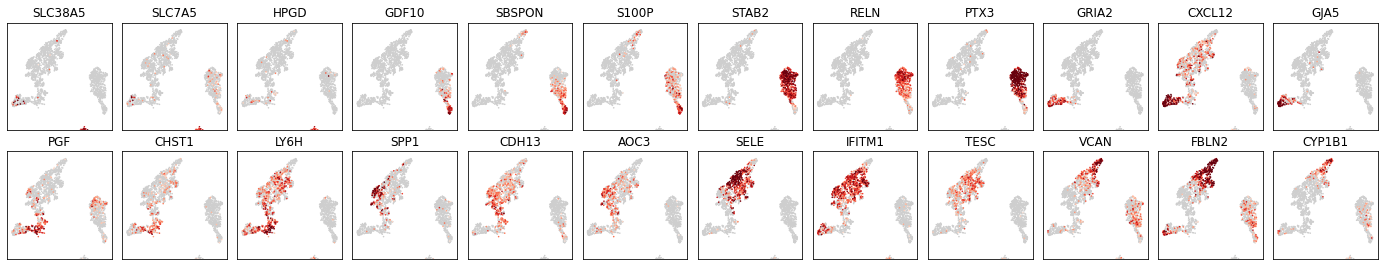

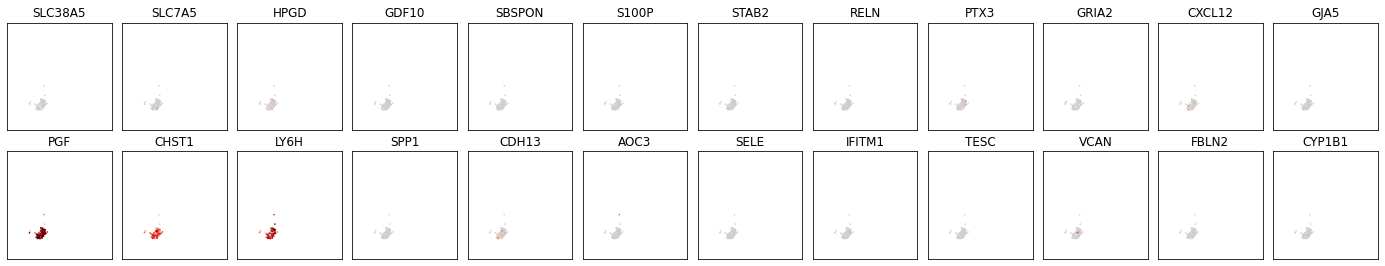

In [39]:
pooled_endo, fsk_ed, org_ed = check_pooled('pooled_endothelium.processed.h5ad')

## Keratinocytes

AnnData object with n_obs × n_vars = 3776 × 15192
    obs: 'batch', 'chemistry_sorting', 'dataset', 'day', 'donor', 'gender', 'n_counts', 'n_genes', 'nh3_annot1', 'percent_hb', 'percent_mito', 'percent_ribo', 'percent_top50', 'rachel_annot3', 'sample_id', 'sanger_id', 'strain', 'week', 'annot', 'leiden_hm_r0_1', 'leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9', 'annot1', 'joint_annot', 'leiden_hm_split1'
    var: 'gene_ids', 'hb', 'cc', 'mito', 'ribo', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'hvg_full'
    uns: 'leiden', 'neighbors', 'neighbors_hm', 'pca'
    obsm: 'X_pca', 'X_pca_hm', 'X_umap_hm'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


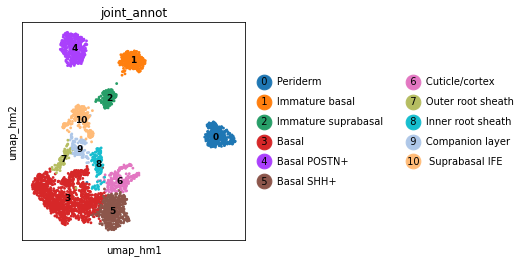

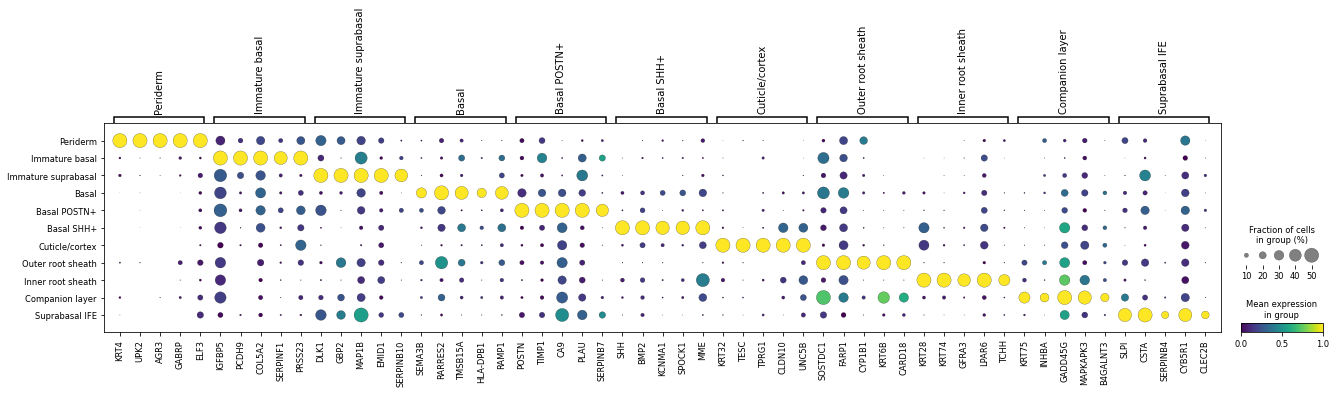

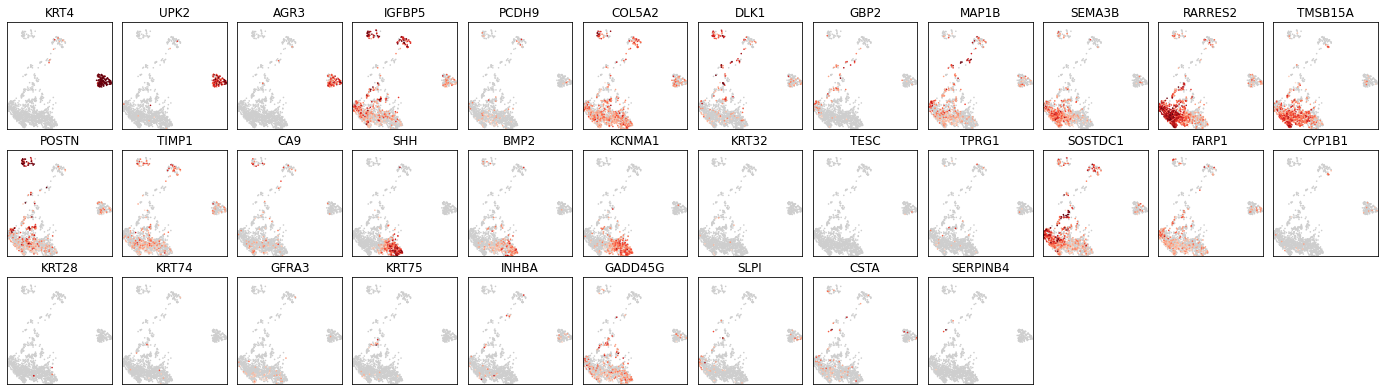

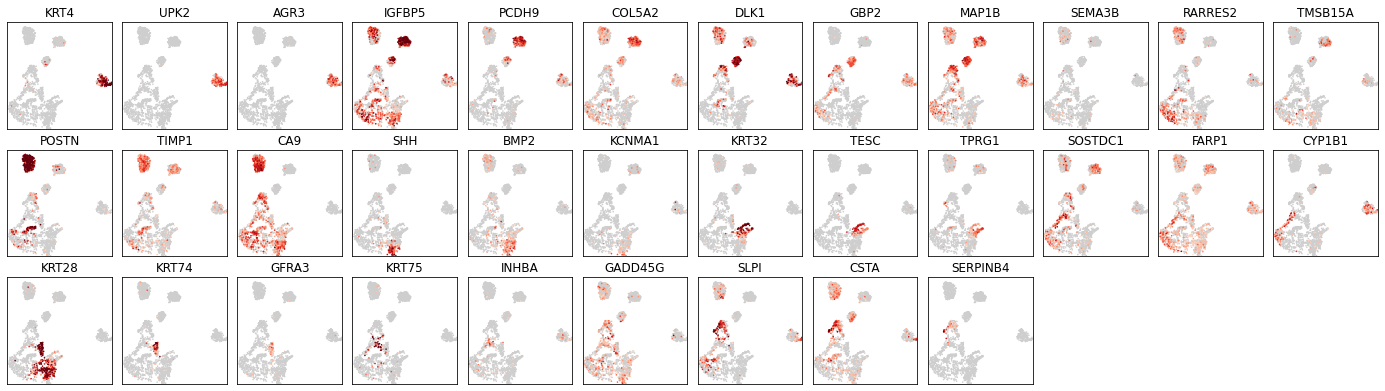

In [5]:
pooled_kc, fsk_kc, org_kc = check_pooled('pooled_keratinocytes.processed.h5ad')

## Melanocytes

AnnData object with n_obs × n_vars = 2114 × 13449
    obs: 'batch', 'chemistry_sorting', 'dataset', 'day', 'donor', 'gender', 'nh3_annot1', 'rachel_annot3', 'sample_id', 'strain', 'week', 'annot', 'n_counts', 'n_genes', 'percent_hb', 'percent_mito', 'percent_ribo', 'percent_top50', 'leiden_hm_r0_1', 'leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9', 'joint_annot'
    var: 'highly_variable', 'cc', 'mito', 'ribo', 'n_counts', 'n_cells'
    obsm: 'X_umap_hm'


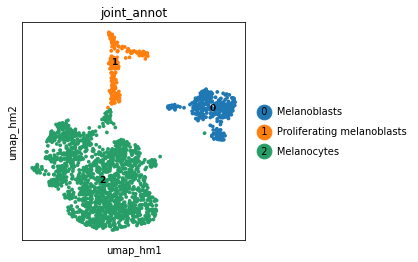

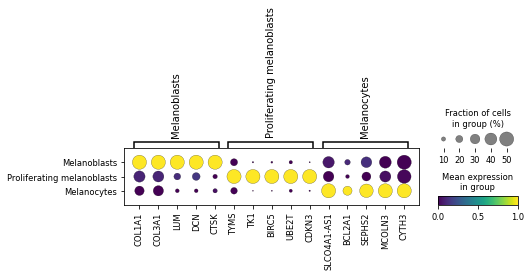

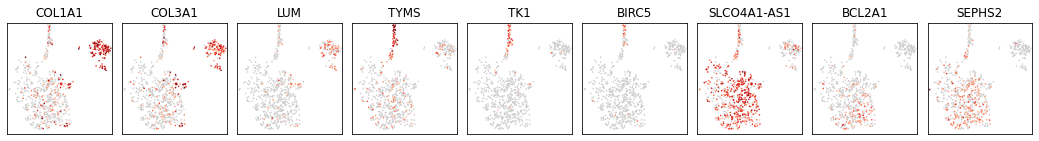

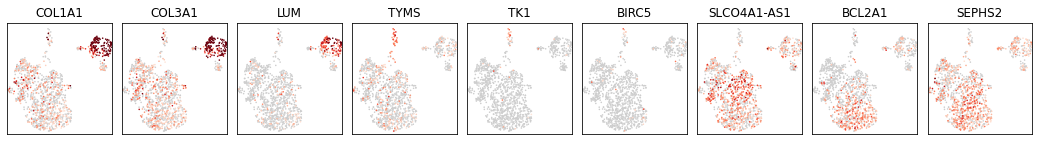

In [6]:
pooled_mc, fsk_mc, org_mc = check_pooled('pooled_melanocytes.processed.h5ad')

## Neuronal

AnnData object with n_obs × n_vars = 11871 × 17663
    obs: 'batch', 'chemistry_sorting', 'dataset', 'day', 'donor', 'gender', 'n_counts', 'n_genes', 'nh3_annot1', 'percent_hb', 'percent_mito', 'percent_ribo', 'percent_top50', 'rachel_annot2', 'sample_id', 'strain', 'week', 'annot', 'leiden_hm_r0_1', 'leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9', '__is_in_cluster__', 'leiden_hm_split1', 'joint_annot'
    var: 'gene_ids', 'hb', 'cc', 'mito', 'ribo', 'n_counts', 'n_cells', 'highly_variable', 'hvg_full'
    uns: 'leiden', 'neighbors', 'neighbors_hm', 'pca', 'rank_genes_groups', 'rank_genes_groups_filtered'
    obsm: 'X_pca', 'X_pca_hm', 'X_umap_hm'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


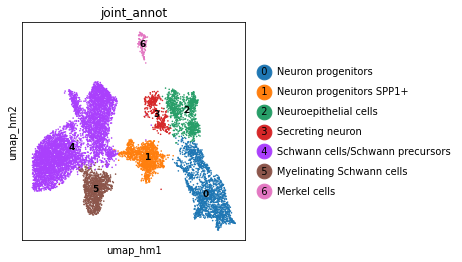

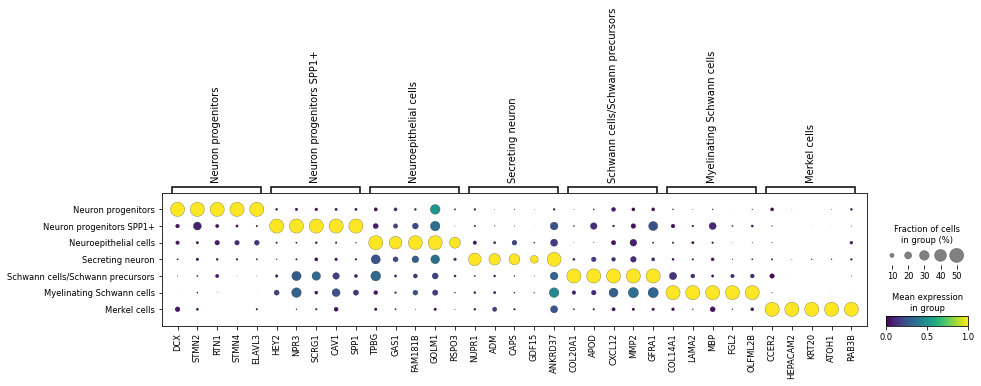

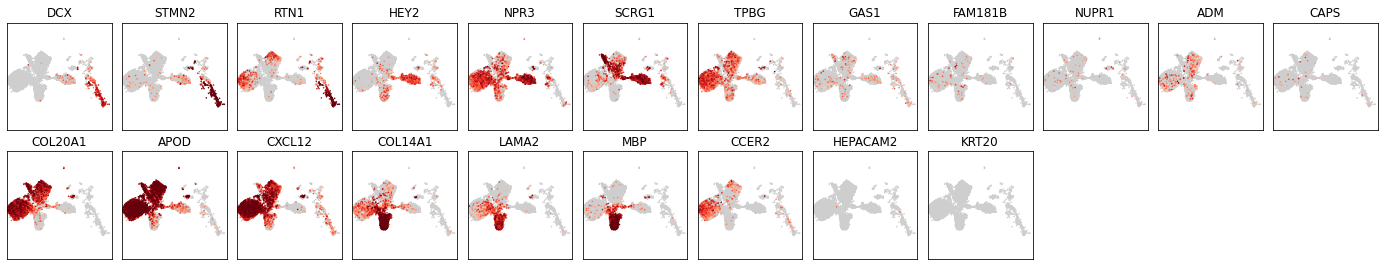

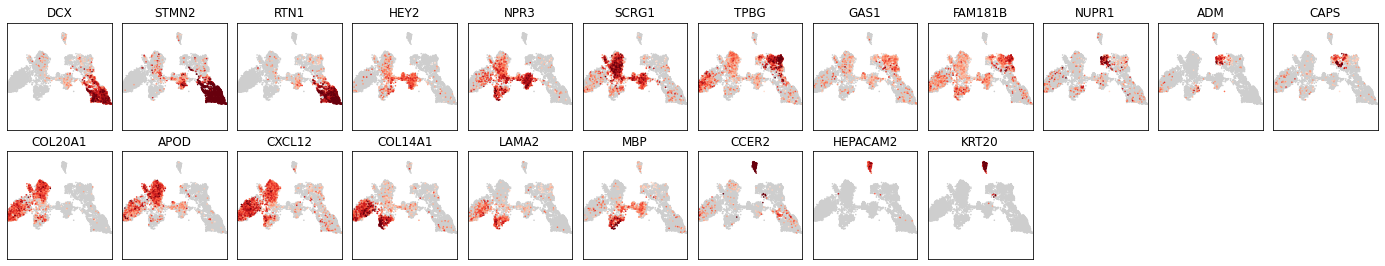

In [7]:
pooled_nr, fsk_nr, org_nr = check_pooled('pooled_neuronal.processed.h5ad')

### Alternative clustering

In [9]:
pooled_nr

AnnData object with n_obs × n_vars = 11871 × 17663
    obs: 'batch', 'chemistry_sorting', 'dataset', 'day', 'donor', 'gender', 'n_counts', 'n_genes', 'nh3_annot1', 'percent_hb', 'percent_mito', 'percent_ribo', 'percent_top50', 'rachel_annot2', 'sample_id', 'strain', 'week', 'annot', 'leiden_hm_r0_1', 'leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9', '__is_in_cluster__', 'leiden_hm_split1', 'joint_annot'
    var: 'gene_ids', 'hb', 'cc', 'mito', 'ribo', 'n_counts', 'n_cells', 'highly_variable', 'hvg_full'
    uns: 'leiden', 'neighbors', 'neighbors_hm', 'pca', 'rank_genes_groups', 'rank_genes_groups_filtered', 'joint_annot_colors'
    obsm: 'X_pca', 'X_pca_hm', 'X_umap_hm'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [16]:
pooled_nr.uns['neighbors_hm']

{'connectivities': <11871x11871 sparse matrix of type '<class 'numpy.float64'>'
 	with 258640 stored elements in Compressed Sparse Row format>,
 'distances': <11871x11871 sparse matrix of type '<class 'numpy.float64'>'
 	with 165915 stored elements in Compressed Sparse Row format>,
 'params': {'method': array(['umap'], dtype=object),
  'metric': array(['euclidean'], dtype=object),
  'n_neighbors': array([15]),
  'n_pcs': array([20]),
  'use_rep': array(['X_pca_hm'], dtype=object)}}

In [17]:
pooled_nr.obsp['neighbors_hm_connectivities'] = pooled_nr.uns['neighbors_hm']['connectivities']
pooled_nr.obsp['neighbors_hm_distances'] = pooled_nr.uns['neighbors_hm']['distances']

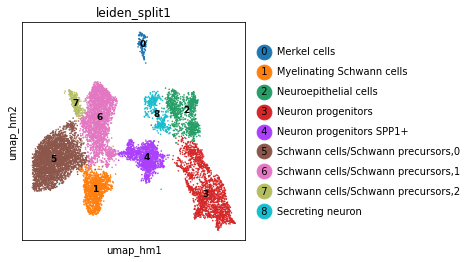

In [22]:
sk.leiden(
    pooled_nr, use_graph='neighbors_hm', restrict_to=('joint_annot', ['Schwann cells/Schwann precursors']),
    resolution=0.15, key_added='split1'
)
sk.plot_embedding(pooled_nr, basis='umap_hm', groupby='leiden_split1');

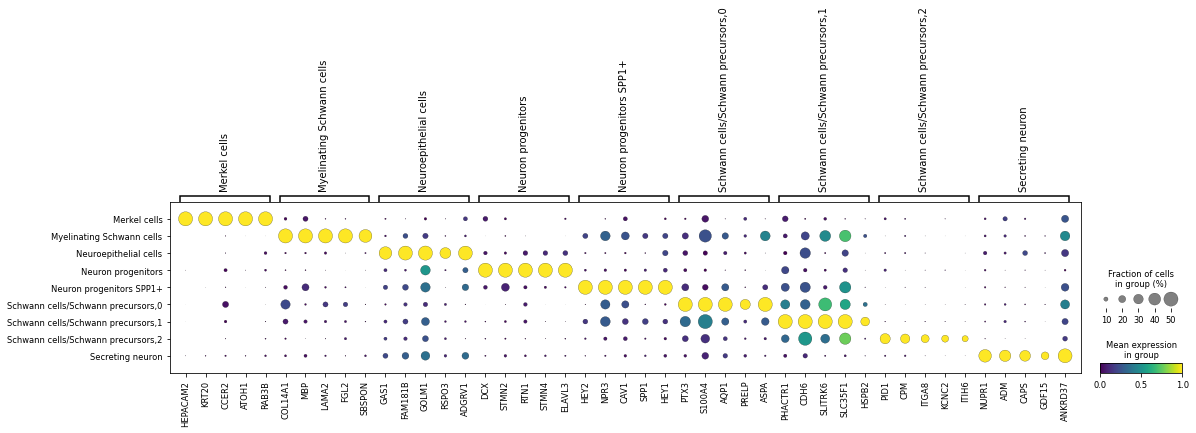

In [24]:
mkst = sk.calc_marker_stats(pooled_nr, groupby='leiden_split1')
mks = sk.filter_marker_stats(mkst[2])
sk.plot_markers(pooled_nr, groupby='leiden_split1', mks=mks, dot_max=0.5, standard_scale='var', cmap='viridis');

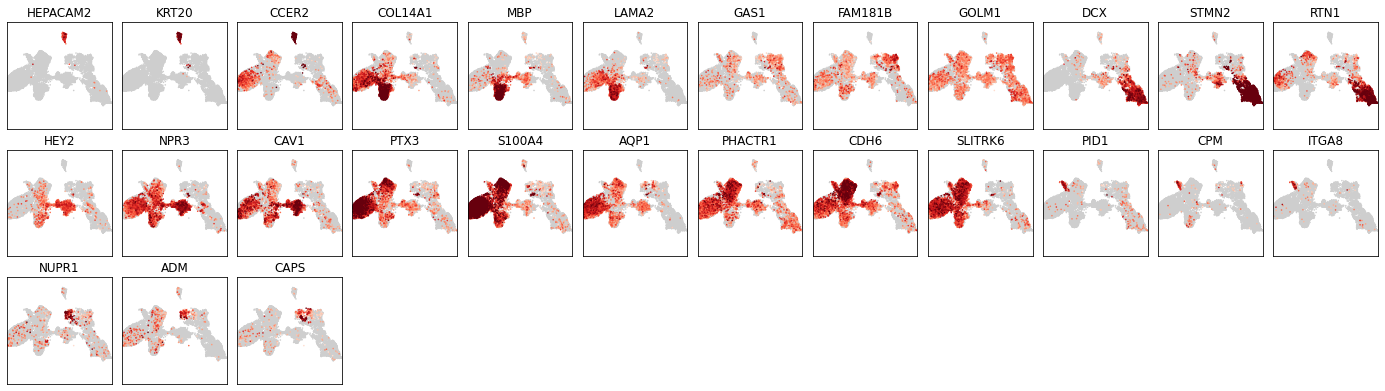

In [25]:
sk.plot_genes(
    pooled_nr, mks.groupby('top_frac_group').head(3).index.to_list(), basis='umap_hm', vmin=0, vmax=3, size=10,
    xlim=(pooled_nr.obsm['X_umap_hm'][:, 0].min(), pooled_nr.obsm['X_umap_hm'][:, 0].max()),
    ylim=(pooled_nr.obsm['X_umap_hm'][:, 1].min(), pooled_nr.obsm['X_umap_hm'][:, 1].max()),
)

## Mesenchymal

AnnData object with n_obs × n_vars = 6213 × 16797
    obs: 'batch', 'chemistry_sorting', 'dataset', 'day', 'donor', 'gender', 'n_counts', 'n_genes', 'nh3_annot1', 'percent_hb', 'percent_mito', 'percent_ribo', 'percent_top50', 'rachel_annot2', 'sample_id', 'strain', 'week', 'annot', 'leiden_hm_r0_1', 'leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9', 'joint_annot'
    var: 'gene_ids', 'hb', 'cc', 'mito', 'ribo', 'n_counts', 'n_cells', 'highly_variable', 'hvg_full'
    uns: 'leiden', 'neighbors', 'neighbors_hm', 'pca'
    obsm: 'X_pca', 'X_pca_hm', 'X_umap_hm'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


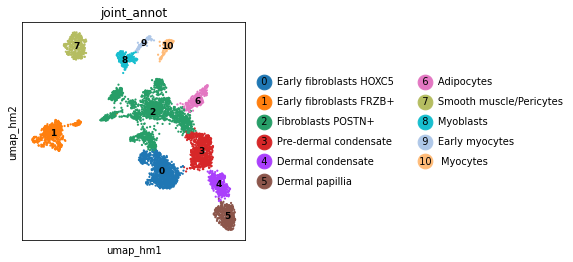

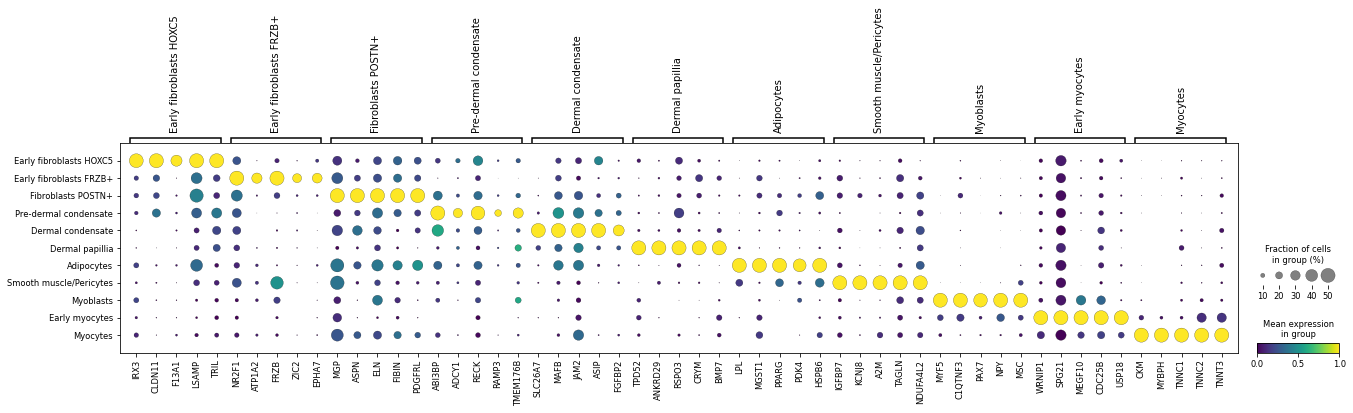

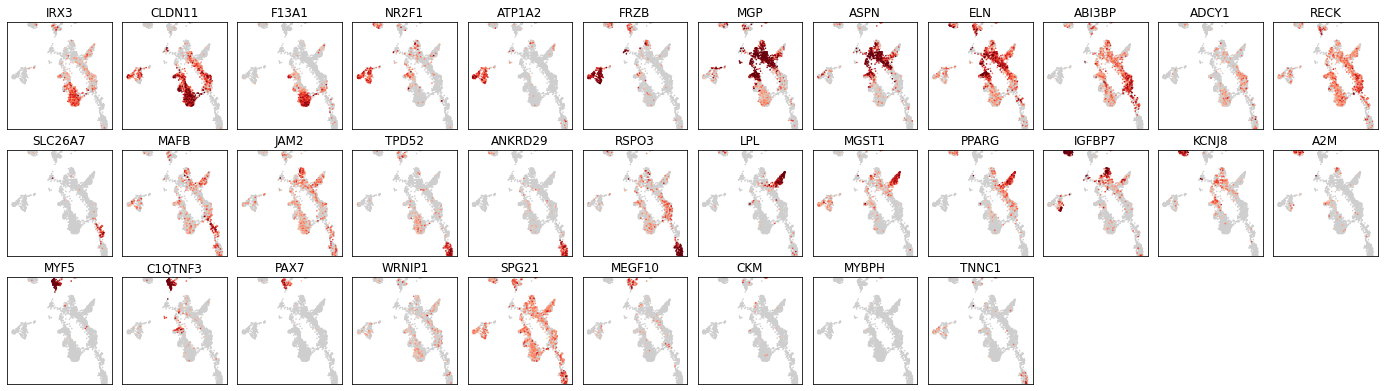

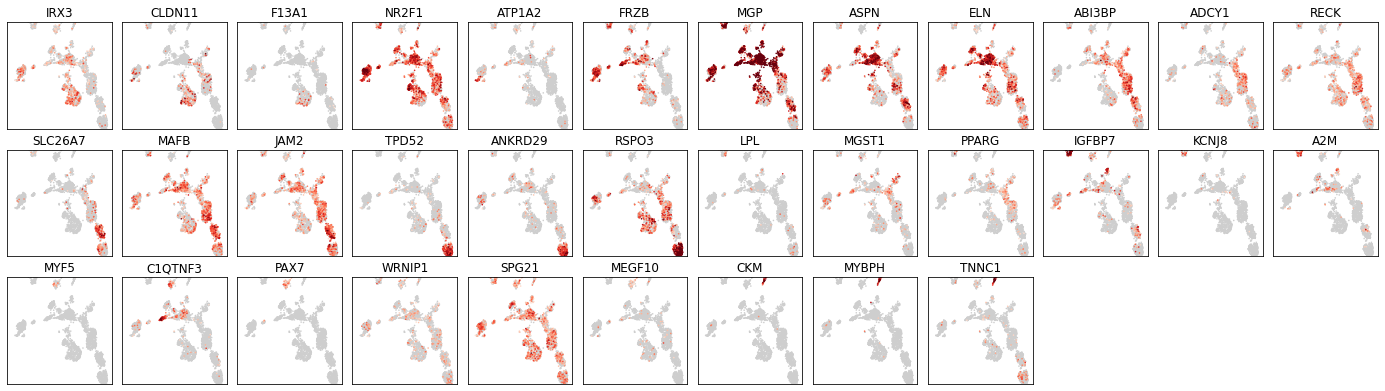

In [30]:
pooled_ms, fsk_ms, org_ms = check_pooled('pooled_mesenchymal.processed.h5ad')

# Prepare cellphonedb input

## Organoid

In [61]:
for i, ad in enumerate((org_ed, org_kc, org_mc, org_nr, org_ms)):
    obs_names = pd.Series([re.sub(r'^([ACGT]+-[0-9+]-[0-9]+).*', r'\1', obn) for obn in ad.obs_names])
    ad.obs_names = obs_names

In [67]:
org_annot = pd.concat([ad.obs[['joint_annot']] for ad in (org_ed, org_kc, org_mc, org_nr, org_ms)], axis=0, ignore_index=False)

In [70]:
org_ad = org_raw_ad[org_raw_ad.obs_names.isin(org_annot.index)].copy()

In [75]:
org_ad.obs = org_ad.obs.merge(org_annot, how='left', left_index=True, right_index=True)

In [76]:
sk.calculate_qc(org_ad)

... storing 'joint_annot' as categorical


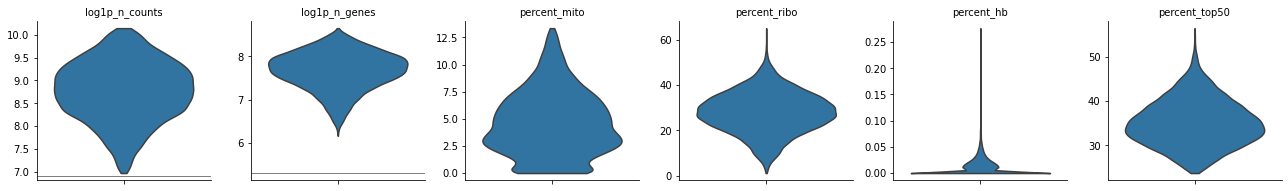

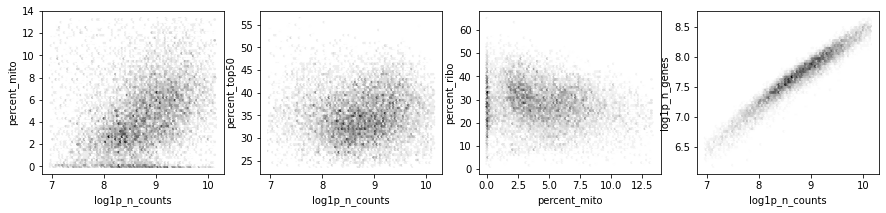

In [77]:
sk.plot_qc(org_ad)

In [80]:
org_ad1 = org_ad[:, org_ad.var.n_cells >= 5].copy()

In [81]:
sc.pp.normalize_total(org_ad1, target_sum=1e4)

In [82]:
sc.pp.log1p(org_ad1)

In [83]:
org_ad1.obs.joint_annot.value_counts()

Schwann cells/Schwann precursors    2757
Neuron progenitors                  1481
Melanocytes                         1057
Fibroblasts POSTN+                  1040
Neuroepithelial cells                818
Neuron progenitors SPP1+             806
Myelinating Schwann cells            472
Basal                                467
Pre-dermal condensate                454
Early fibroblasts HOXC5              425
Early fibroblasts FRZB+              423
Basal POSTN+                         382
Secreting neuron                     318
Dermal condensate                    290
Dermal papillia                      264
Immature basal                       254
Basal SHH+                           241
Melanoblasts                         204
Suprabasal IFE                       200
Smooth muscle/Pericytes              198
Cuticle/cortex                       192
Periderm                             188
Immature suprabasal                  159
Merkel cells                         129
Inner root sheat

In [85]:
org_ad2 = org_ad1[org_ad1.obs.joint_annot.isin(sk.get_good_sized_batch(org_ad1.obs.joint_annot, min_size=10))].copy()

In [87]:
org_ad2.obs = org_ad2.obs[['joint_annot']].copy()

In [89]:
org_ad2

AnnData object with n_obs × n_vars = 13912 × 22033
    obs: 'joint_annot'
    var: 'gene_symbols', 'gene_ids', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells'
    uns: 'log1p'

In [90]:
org_ad2S = sk.subsample(org_ad2, 1, groupby='joint_annot', min_n=200, max_n=300)

In [91]:
sk.write_table(org_ad2S, outdir='organoid', slots=['X', 'obs'], transpose=True, X_dtype=np.float32, obs_columns=['joint_annot'])

## fetal skin

In [3]:
fsk_ad = sk.restore_adata(fsk_processed_ad, restore_type='norm', obs_cols=['annot2'], use_raw=True)

In [111]:
fsk_ad.var.n_cells.min()

3

In [4]:
fsk_ad1 = fsk_ad[:, fsk_ad.var.n_cells >= 5].copy()

In [113]:
fsk_ad1.obs.annot2.value_counts()

Fibroblast WNT2+           29109
Pre-dermal condensate      22724
Macrophage1                18058
Early fibroblast HOXC5+    15275
Early fibroblast FRZB+     10877
                           ...  
Companion layer               27
Outer root sheath             25
Cuticle/cortex                21
Inner root sheath             18
Immature suprabasal           15
Name: annot2, Length: 84, dtype: int64

In [5]:
fsk_ad1S = sk.subsample(fsk_ad1, 1, groupby='annot2', min_n=100, max_n=100)

In [6]:
fsk_ad1S

AnnData object with n_obs × n_vars = 7658 × 27968
    obs: 'annot2'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_cells', 'cc'

In [7]:
fsk_ad1S.obs_names[0:10]

Index(['AAAGTAGCAGATCGGA-1-4834STDY7002879',
       'AACTCAGCAGGTCTCG-1-4834STDY7002879',
       'ACTTACTCAAATCCGT-1-4834STDY7002879',
       'AGAATAGGTTCGCGAC-1-4834STDY7002879',
       'AGCGTCGCAGGATCGA-1-4834STDY7002879',
       'AGCGTCGGTGGGTCAA-1-4834STDY7002879',
       'AGGCCACCATTGAGCT-1-4834STDY7002879',
       'CACATTTGTTAAAGTG-1-4834STDY7002879',
       'CAGCATAAGGTTCCTA-1-4834STDY7002879',
       'CAGCGACGTTCAGACT-1-4834STDY7002879'],
      dtype='object', name='index')

In [9]:
fsk_ad1S.write('fetal_skin/fetal_skin_downsampled_for_cellphonedb.h5ad', compression='lzf')

In [10]:
fsk_ad1S.obs.to_csv('fetal_skin/obs.tsv', sep='\t')

In [6]:
sk.write_table(fsk_ad1S, outdir='fetal_skin', slots=['X', 'obs'], transpose=True, X_dtype=np.float32, obs_columns=['annot2'])